Загрузка библиотеки

In [64]:
import pandas as pd

%matplotlib inline

In [59]:
print(pd.__version__)

0.20.1


Чтение файла

In [4]:
data = pd.read_csv('Pandas - Q1 Sales.csv')

Выведем первые строки

In [5]:
data.head()

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
0,India,North,John,2/1/2012 0:00:00,100000,567
1,US,North,Bill,4/16/2012 0:00:00,120000,3000
2,UK,North,Thomas,7/31/2014 0:00:00,140000,345
3,Australia,East,John,11/24/2012 0:00:00,160000,1000
4,Africa,East,Bill,6/11/2012 0:00:00,180000,123


Посмотрим на типы данных и описательные статистики

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
Country             20 non-null object
Region              20 non-null object
Sales Person        20 non-null object
Date of Purchase    20 non-null object
Total               20 non-null int64
Quantity            20 non-null int64
dtypes: int64(2), object(4)
memory usage: 1.0+ KB


In [10]:
data.describe()

,Total,Quantity
count,2.000000e+01,20.000000
mean,1.502500e+06,977.900000
std,5.769280e+06,1761.923497
min,1.000000e+05,85.000000
25%,1.400000e+05,90.000000
50%,1.700000e+05,505.500000
75%,2.250000e+05,1000.000000
max,2.600000e+07,7890.000000


Посмотрим на список стран

In [60]:
data['Country'].unique()

array(['India', 'US', 'UK', 'Australia', 'Africa', 'Singapore', 'Mylasia'], dtype=object)

Мы можем тут же создать новую переменную, которая объединяет страну и регион

In [61]:
data['Subregion'] = [x+'_'+y for x,y in zip(data['Region'], data['Country'])]

In [63]:
data.head()

,Country,Region,Sales Person,Date of Purchase,Total,Quantity,Subregion
Date of Purchase,,,,,,,
2012-02-01,India,North,John,2/1/2012 0:00:00,100000,567,North_India
2012-04-16,US,North,Bill,4/16/2012 0:00:00,120000,3000,North_US
2014-07-31,UK,North,Thomas,7/31/2014 0:00:00,140000,345,North_UK
2012-11-24,Australia,East,John,11/24/2012 0:00:00,160000,1000,East_Australia
2012-06-11,Africa,East,Bill,6/11/2012 0:00:00,180000,123,East_Africa


Date of Purchase имеет формат **str**, хотя очевидно, что это дата, давайте приведем его к формату даты (datetime.datetime)

In [12]:
from datetime import datetime

In [15]:
index_1 = [datetime.strptime(x, '%m/%d/%Y %H:%M:%S') for x in data['Date of Purchase']]

In [16]:
index_2 = data['Date of Purchase'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S'))

In [19]:
data.index = index_2

In [21]:
data.head(10)

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
Date of Purchase,,,,,,
2012-02-01,India,North,John,2/1/2012 0:00:00,100000,567
2012-04-16,US,North,Bill,4/16/2012 0:00:00,120000,3000
2014-07-31,UK,North,Thomas,7/31/2014 0:00:00,140000,345
2012-11-24,Australia,East,John,11/24/2012 0:00:00,160000,1000
2012-06-11,Africa,East,Bill,6/11/2012 0:00:00,180000,123
2017-04-24,Singapore,East,Thomas,4/24/2017 0:00:00,200000,1000
2013-10-18,Mylasia,West,John,10/18/2013 0:00:00,1000000,7890
2018-08-18,India,West,Bill,8/18/2018 0:00:00,240000,200
2013-12-25,US,West,Thomas,12/25/2013 0:00:00,26000000,1000


Пример обращения по индексу

In [32]:
data[data.index < '2013']

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
Date of Purchase,,,,,,
2012-02-01,India,North,John,2/1/2012 0:00:00,100000,567
2012-04-16,US,North,Bill,4/16/2012 0:00:00,120000,3000
2012-11-24,Australia,East,John,11/24/2012 0:00:00,160000,1000
2012-06-11,Africa,East,Bill,6/11/2012 0:00:00,180000,123
2010-07-29,Australia,North,Bill,7/29/2010 0:00:00,120000,567
2012-06-10,Africa,North,Thomas,6/10/2012 0:00:00,140000,1000
2011-04-28,UK,West,Bill,4/28/2011 0:00:00,240000,90
2012-01-25,Singapore,North,Bill,1/25/2012 0:00:00,150000,85


In [35]:
data[(data.index < '2014') & (data.index > '2013')]

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
Date of Purchase,,,,,,
2013-10-18,Mylasia,West,John,10/18/2013 0:00:00,1000000,7890
2013-12-25,US,West,Thomas,12/25/2013 0:00:00,26000000,1000
2013-06-10,Mylasia,East,Bill,6/10/2013 0:00:00,180000,444
2013-08-01,US,West,John,8/1/2013 0:00:00,220000,90


In [36]:
data[data.index < '2013-07-20']

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
Date of Purchase,,,,,,
2012-02-01,India,North,John,2/1/2012 0:00:00,100000,567
2012-04-16,US,North,Bill,4/16/2012 0:00:00,120000,3000
2012-11-24,Australia,East,John,11/24/2012 0:00:00,160000,1000
2012-06-11,Africa,East,Bill,6/11/2012 0:00:00,180000,123
2010-07-29,Australia,North,Bill,7/29/2010 0:00:00,120000,567
2012-06-10,Africa,North,Thomas,6/10/2012 0:00:00,140000,1000
2013-06-10,Mylasia,East,Bill,6/10/2013 0:00:00,180000,444
2011-04-28,UK,West,Bill,4/28/2011 0:00:00,240000,90
2012-01-25,Singapore,North,Bill,1/25/2012 0:00:00,150000,85


Помимо обращения по индексу можно "фильтровать" по условию (маске)

In [53]:
data[data['Total'] < 120000]

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
Date of Purchase,,,,,,
2012-02-01,India,North,John,2/1/2012 0:00:00,100000,567
2016-04-09,UK,North,John,4/9/2016 0:00:00,100000,1000


In [56]:
data[(data['Total'] < 120000) & (data['Country']=='UK')]

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
Date of Purchase,,,,,,
2016-04-09,UK,North,John,4/9/2016 0:00:00,100000,1000


Если ничего не соответствует условиям, то вернется пустой dataframe

In [57]:
data[(data['Total'] < 120000) & (data['Country']=='Slovenia')]

,Country,Region,Sales Person,Date of Purchase,Total,Quantity
Date of Purchase,,,,,,


Посмотрим на траты людей по странам (Country)

In [23]:
data.groupby('Country').agg('sum')

,Total,Quantity
Country,,
Africa,460000,1208
Australia,540000,1657
India,540000,857
Mylasia,1180000,8334
Singapore,510000,1977
UK,480000,1435
US,26340000,4090


Со сгруппированными данными можно работать и в циклах

In [26]:
for x in data.groupby('Country'):
    print(x[0])
    print(x[1])
    break
x[1].head()

Africa
                 Country Region Sales Person    Date of Purchase   Total  \
Date of Purchase                                                           
2012-06-11        Africa   East         Bill   6/11/2012 0:00:00  180000   
2012-06-10        Africa  North       Thomas   6/10/2012 0:00:00  140000   
2015-12-14        Africa  North         John  12/14/2015 0:00:00  140000   

                  Quantity  
Date of Purchase            
2012-06-11             123  
2012-06-10            1000  
2015-12-14              85  


,Country,Region,Sales Person,Date of Purchase,Total,Quantity
Date of Purchase,,,,,,
2012-06-11,Africa,East,Bill,6/11/2012 0:00:00,180000,123
2012-06-10,Africa,North,Thomas,6/10/2012 0:00:00,140000,1000
2015-12-14,Africa,North,John,12/14/2015 0:00:00,140000,85


Можно группировать по нескольким полям

In [29]:
data.groupby(['Country', 'Region']).agg('sum')

Total  Quantity
Country   Region                    
Africa    East      180000       123
          North     280000      1085
Australia East      160000      1000
          North     120000       567
          West      260000        90
India     East      200000        90
          North     100000       567
          West      240000       200
Mylasia   East      180000       444
          West     1000000      7890
Singapore East      360000      1892
          North     150000        85
UK        North     240000      1345
          West      240000        90
US        North     120000      3000
          West    26220000      1090

In [37]:
data.groupby(['Country', 'Region']).agg('mean')

Total  Quantity
Country   Region                      
Africa    East      180000.0     123.0
          North     140000.0     542.5
Australia East      160000.0    1000.0
          North     120000.0     567.0
          West      260000.0      90.0
India     East      200000.0      90.0
          North     100000.0     567.0
          West      240000.0     200.0
Mylasia   East      180000.0     444.0
          West     1000000.0    7890.0
Singapore East      180000.0     946.0
          North     150000.0      85.0
UK        North     120000.0     672.5
          West      240000.0      90.0
US        North     120000.0    3000.0
          West    13110000.0     545.0

Можно применять свои функции 

In [51]:
import numpy as np
def custom(x):
    return (sum(x)-np.mean(x))**2 / len(x)
    
data.groupby(['Country']).agg(custom)

,Total,Quantity
Country,,
Africa,3.134815e+10,2.161873e+05
Australia,4.320000e+10,4.067628e+05
India,4.320000e+10,1.088073e+05
Mylasia,1.740500e+11,8.681944e+06
Singapore,3.853333e+10,5.790413e+05
UK,3.413333e+10,3.050704e+05
US,1.027845e+14,2.478237e+06


Визуализация данных

In [82]:
%matplotlib inline

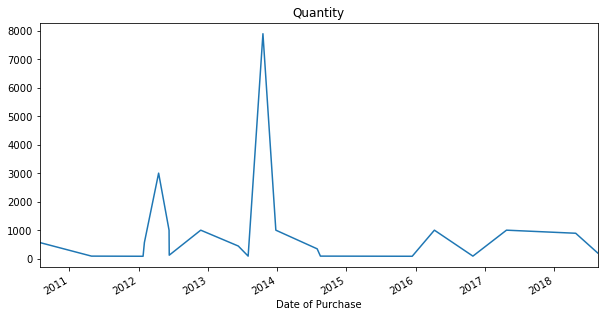

In [83]:
data['Quantity'].plot(title='Quantity', figsize=(10,5))

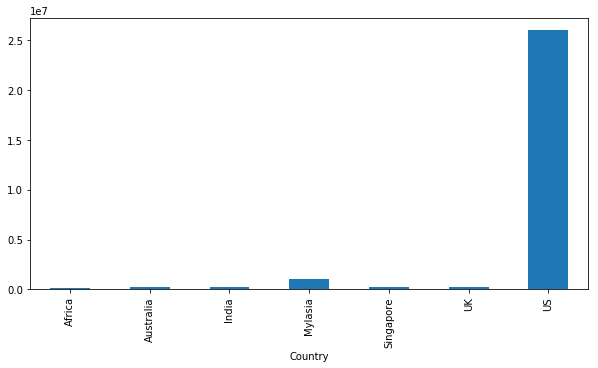

In [84]:
data.groupby(['Country']).agg('max')['Total'].plot.bar(figsize=(10,5))

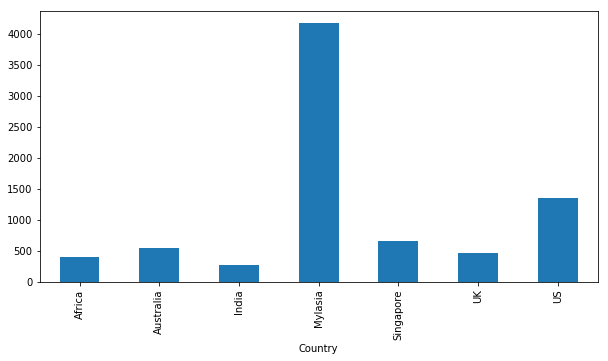

In [85]:
data.groupby(['Country']).agg('mean')['Quantity'].plot.bar(figsize=(10,5))

Применение функций к столбцу

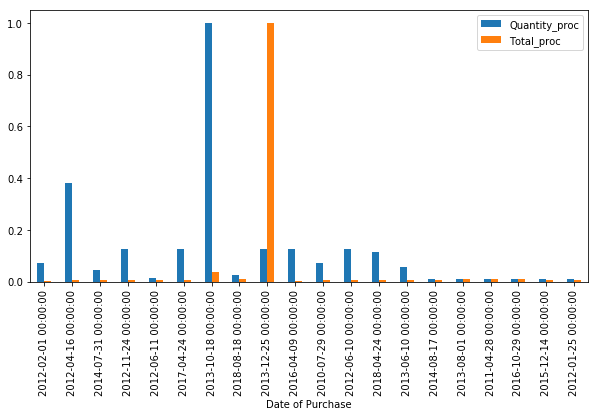

In [90]:
data['Quantity_proc'] = data['Quantity'].apply(lambda x: x/data['Quantity'].max())
data['Total_proc'] = data['Total'].apply(lambda x: x/data['Total'].max())

data[['Quantity_proc', 'Total_proc']].plot.bar(figsize=(10,5))

Задачи:

Сколько уникальных Sales Person? (по стране и региону считается уникальным)

В каком году было больше всего продаж? (Total)

Нарисуйте barplot количества продаж (Total) по годам

Сделайте min-max scaling к столбца Total 

Структура min_max:

    min = минимальный элемент в столбце
    max = максимальный элемент в столбце
    
    x_new = (x-min)/(max-min)

Постройте график (barplot) для полученных в прошлом номере значений